In [1]:
path= '/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/'
print(path)
import os,sys
sys.path.append(path)

/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/


In [2]:
from lightcurve_practice_code import extract_TESS_photometry

In [3]:
newpath = os.getcwd()+'/smoothing_practice/'

In [4]:
if os.path.exists(newpath)==False:
    os.mkdir(newpath)
else:
    print(newpath,'exists!')

/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/smoothing_practice/ exists!


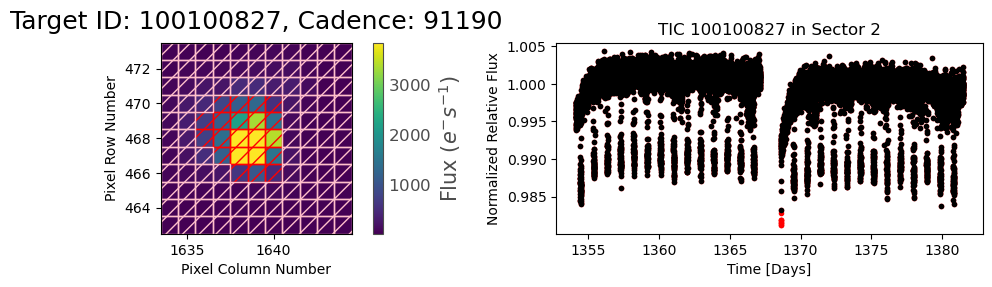

In [5]:
# ID = 200322593
# starname='TIC'+str(ID) #TOI-540

ID = 100100827
starname='TIC '+str(ID) #WASP-18
author='SPOC'
nsigma=2
save_directory=newpath
mask_threshold=7.5

lc=extract_TESS_photometry(starname,author,nsigma,save_directory,mask_threshold)

In [6]:
type(lc)

lightkurve.lightcurve.LightCurve

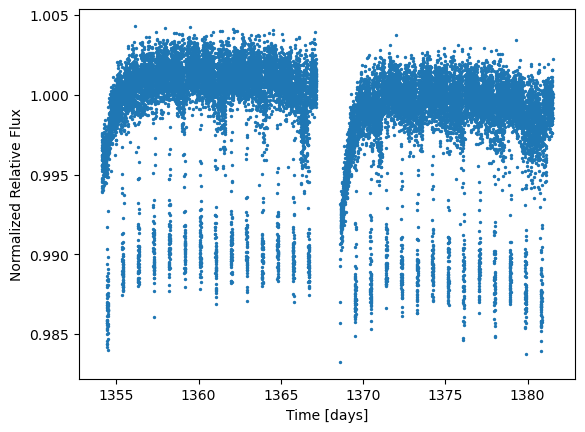

In [7]:
import matplotlib.pyplot as plt 

plt.scatter(lc.time.value,lc.flux.value,s=2)
plt.xlabel('Time [days]')
plt.ylabel('Normalized Relative Flux')
plt.show()



# Now that we have a lightcurve with a rotation signal (sine-like wave signal), we are going to practice using "lightkurve" to smooth this function to remove this rotation signal.

## Lightkurve's "flatten" function uses a Savitsky-Golay filter, which fits a N-th order polynomial for a given window of time. 

# Below, we are going to try different window sizes with a 3rd order polynomial to see how it affects the rotation signal AND the transits that exist within WASP-18's light curve

In [8]:
#NOTE: window lengths MUST be odd (for mathy reasons...)

newlc1,trend1 = lc.flatten(window_length=31,polyorder=3,return_trend=True)
newlc2,trend2 = lc.flatten(window_length=101,polyorder=3,return_trend=True)
newlc3,trend3 = lc.flatten(window_length=301,polyorder=3,return_trend=True)
newlc4,trend4 = lc.flatten(window_length=1001,polyorder=3,return_trend=True)
newlc5,trend5 = lc.flatten(window_length=3001,polyorder=3,return_trend=True)

# Before we get into this, how can we algorithmically measure rotation signals?

## One approximation for stellar rotation's light curve feature is to assume it is like a sine-wave. One type of algorithm that is really good at detecting sine waves is a Lomb-Scargle algorithm. This basically finds what period in time corresponds to sine-like features lining up in phase-space. We can use lightkurve to do Lomb-Scargle searches too!

### For more info, see https://docs.lightkurve.org/tutorials/3-science-examples/periodograms-creating-periodograms.html

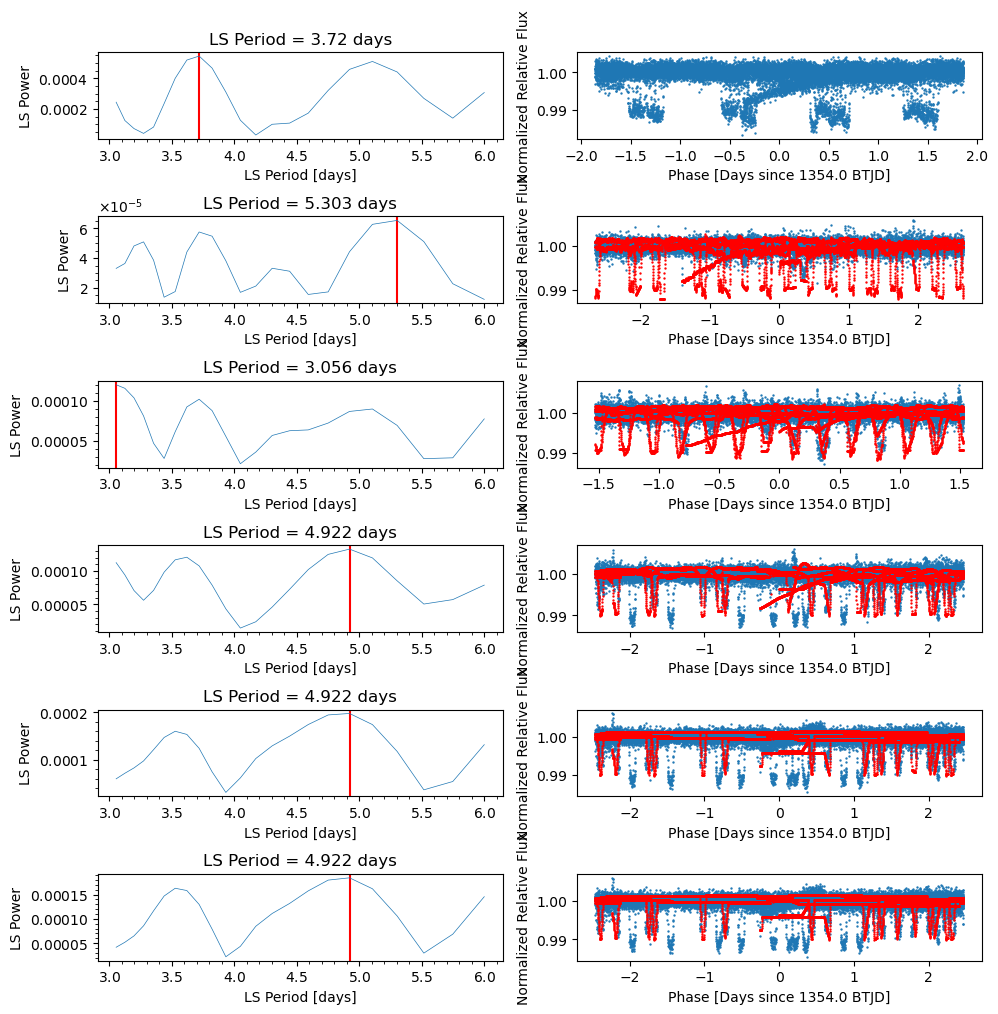

In [9]:
# max_period = (np.max(lc.time.value) - np.min(lc.time.value))/3
min_period=3
max_period = 6

LS0 = lc.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)
LS1 = newlc1.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)
LS2 = newlc2.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)
LS3 = newlc3.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)
LS4 = newlc4.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)
LS5 = newlc5.to_periodogram(method='lombscargle',minimum_period=min_period,maximum_period=max_period)

# most-likely rotation period from lomb-scargle periodogram
LS_period0=LS0.period_at_max_power.value
LS_period1=LS1.period_at_max_power.value
LS_period2=LS2.period_at_max_power.value
LS_period3=LS3.period_at_max_power.value
LS_period4=LS4.period_at_max_power.value
LS_period5=LS5.period_at_max_power.value

# let's plot up the results!
import numpy as np


fig=plt.figure(figsize=(10,10))
rows=6
columns=2
ax0 = fig.add_subplot(rows, columns, 1)
ax0b = fig.add_subplot(rows, columns, 2)
ax1 = fig.add_subplot(rows, columns, 3)
ax1b = fig.add_subplot(rows, columns, 4)
ax2 = fig.add_subplot(rows, columns, 5)
ax2b = fig.add_subplot(rows, columns, 6)
ax3 = fig.add_subplot(rows, columns, 7)
ax3b = fig.add_subplot(rows, columns, 8)
ax4 = fig.add_subplot(rows, columns, 9)
ax4b = fig.add_subplot(rows, columns, 10)
ax5 = fig.add_subplot(rows, columns, 11)
ax5b = fig.add_subplot(rows, columns, 12)

LS0.plot(ax=ax0)
ax0.axvline(x=LS_period0,color='red',zorder=-10)
ax0.set_title('LS Period = '+str(np.round(LS_period0,3))+' days')
ax0.set_xlabel('LS Period [days]')
ax0.set_ylabel('LS Power')
lc.fold(period=LS_period0,epoch_time=np.min(lc.time.value)).scatter(s=2,ax=ax0b)
ax0b.set_xlabel('Phase [Days since '+str(np.round(np.min(lc.time.value)))+' BTJD]')
ax0b.set_ylabel('Normalized Relative Flux')

LS1.plot(ax=ax1)
ax1.axvline(x=LS_period1,color='red',zorder=-10)
ax1.set_title('LS Period = '+str(np.round(LS_period1,3))+' days')
ax1.set_xlabel('LS Period [days]')
ax1.set_ylabel('LS Power')
newlc1.fold(period=LS_period1,epoch_time=np.min(newlc1.time.value)).scatter(s=2,ax=ax1b)
trend1.fold(period=LS_period1,epoch_time=np.min(newlc1.time.value)).scatter(s=2,ax=ax1b,color='red')
ax1b.set_xlabel('Phase [Days since '+str(np.round(np.min(newlc1.time.value)))+' BTJD]')
ax1b.set_ylabel('Normalized Relative Flux')

LS2.plot(ax=ax2)
ax2.axvline(x=LS_period2,color='red',zorder=-10)
ax2.set_title('LS Period = '+str(np.round(LS_period2,3))+' days')
ax2.set_xlabel('LS Period [days]')
ax2.set_ylabel('LS Power')
newlc2.fold(period=LS_period2,epoch_time=np.min(newlc2.time.value)).scatter(s=2,ax=ax2b)
trend2.fold(period=LS_period2,epoch_time=np.min(newlc2.time.value)).scatter(s=2,ax=ax2b,color='red')
ax2b.set_xlabel('Phase [Days since '+str(np.round(np.min(newlc2.time.value)))+' BTJD]')
ax2b.set_ylabel('Normalized Relative Flux')

LS3.plot(ax=ax3)
ax3.axvline(x=LS_period3,color='red',zorder=-10)
ax3.set_title('LS Period = '+str(np.round(LS_period3,3))+' days')
ax3.set_xlabel('LS Period [days]')
ax3.set_ylabel('LS Power')
newlc3.fold(period=LS_period3,epoch_time=np.min(newlc3.time.value)).scatter(s=2,ax=ax3b)
trend3.fold(period=LS_period3,epoch_time=np.min(newlc3.time.value)).scatter(s=2,ax=ax3b,color='red')
ax3b.set_xlabel('Phase [Days since '+str(np.round(np.min(newlc3.time.value)))+' BTJD]')
ax3b.set_ylabel('Normalized Relative Flux')

LS4.plot(ax=ax4)
ax4.axvline(x=LS_period4,color='red',zorder=-10)
ax4.set_title('LS Period = '+str(np.round(LS_period4,3))+' days')
ax4.set_xlabel('LS Period [days]')
ax4.set_ylabel('LS Power')
newlc4.fold(period=LS_period4,epoch_time=np.min(newlc4.time.value)).scatter(s=2,ax=ax4b)
trend4.fold(period=LS_period4,epoch_time=np.min(newlc4.time.value)).scatter(s=2,ax=ax4b,color='red')
ax4b.set_xlabel('Phase [Days since '+str(np.round(np.min(newlc4.time.value)))+' BTJD]')
ax4b.set_ylabel('Normalized Relative Flux')

LS5.plot(ax=ax5)
ax5.axvline(x=LS_period5,color='red',zorder=-10)
ax5.set_title('LS Period = '+str(np.round(LS_period5,3))+' days')
ax5.set_xlabel('LS Period [days]')
ax5.set_ylabel('LS Power')
newlc5.fold(period=LS_period5,epoch_time=np.min(newlc5.time.value)).scatter(s=2,ax=ax5b)
trend5.fold(period=LS_period5,epoch_time=np.min(newlc5.time.value)).scatter(s=2,ax=ax5b,color='red')
ax5b.set_xlabel('Phase [Days since '+str(np.round(np.min(newlc5.time.value)))+' BTJD]')
ax5b.set_ylabel('Normalized Relative Flux')

fig.tight_layout(pad=1)
plt.show()

# The actual rotation period of WASP-18 is about 5.6 days.

# With this filter (Savitsky-Golay), it looks like the large jupiter-sized transits are making it difficult to measure the rotation signal.

# But how does this filtering of the photometry affect the transits?

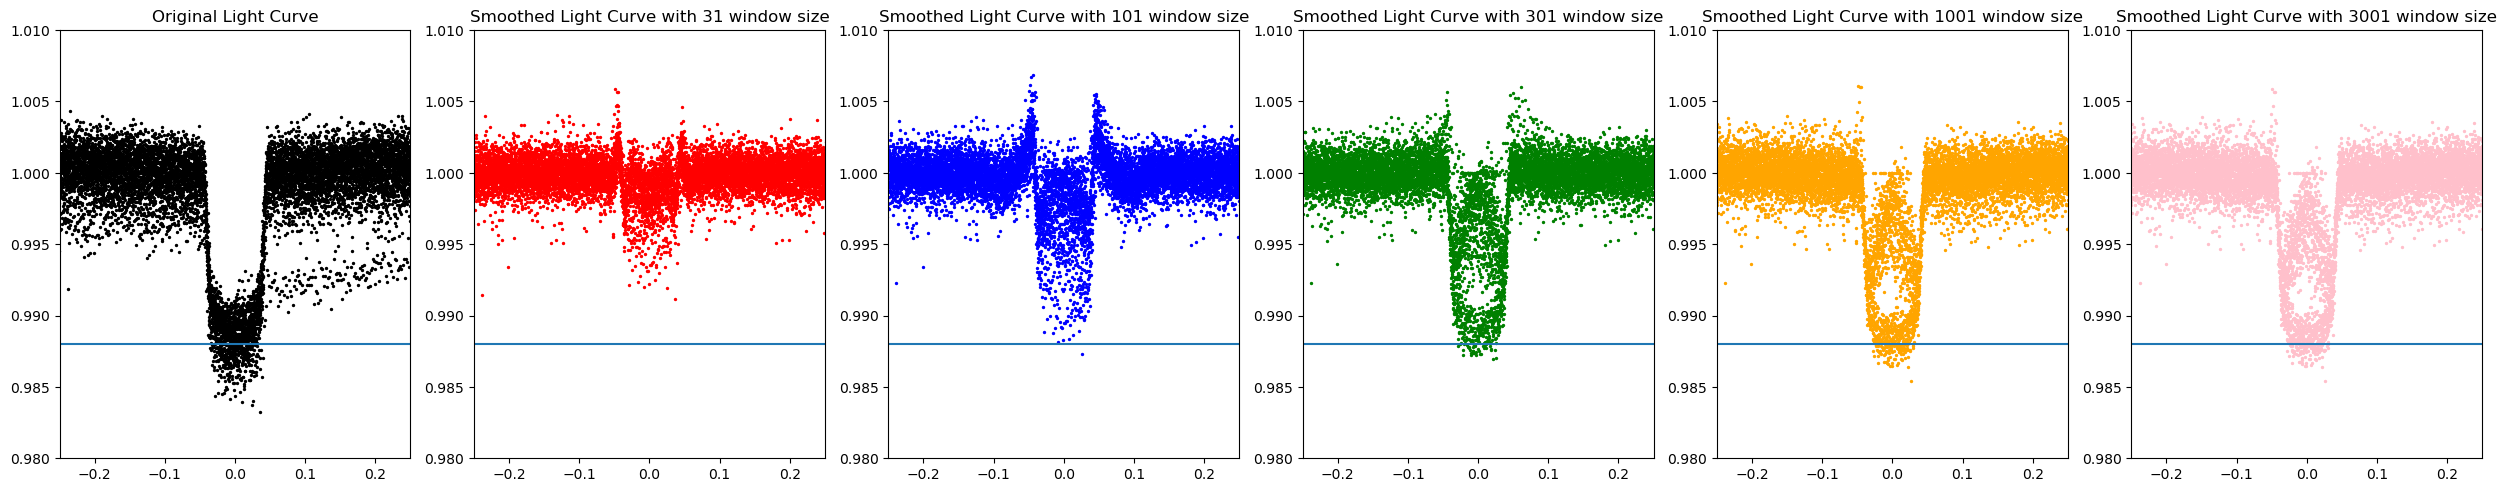

In [10]:
from lightcurve_practice_code import phasefold_version2

# let's use WASP-18b's published planet parameters
T0 = 2458375.169883 - 2457000 #converting from julian days to TESS julian days
P = 0.9414526
Dur=6/24

pf0,ff0,fe0 = phasefold_version2(lc.time.value,lc.flux.value,lc.flux_err.value,T0,P)
pf1,ff1,fe1 = phasefold_version2(newlc1.time.value,newlc1.flux.value,newlc1.flux_err.value,T0,P)
pf2,ff2,fe2 = phasefold_version2(newlc2.time.value,newlc2.flux.value,newlc2.flux_err.value,T0,P)
pf3,ff3,fe3 = phasefold_version2(newlc3.time.value,newlc3.flux.value,newlc3.flux_err.value,T0,P)
pf4,ff4,fe4 = phasefold_version2(newlc4.time.value,newlc4.flux.value,newlc4.flux_err.value,T0,P)
pf5,ff5,fe5 = phasefold_version2(newlc5.time.value,newlc5.flux.value,newlc5.flux_err.value,T0,P)


fig=plt.figure(figsize=(25,5))
rows=1
columns=6
ax0 = fig.add_subplot(rows, columns, 1)
ax1 = fig.add_subplot(rows, columns, 2)
ax2 = fig.add_subplot(rows, columns, 3)
ax3 = fig.add_subplot(rows, columns, 4)
ax4 = fig.add_subplot(rows, columns, 5)
ax5 = fig.add_subplot(rows, columns, 6)


ax0.scatter(pf0,ff0,s=2,color='black')
ax0.set_xlim(-Dur,Dur)
ax0.set_title('Original Light Curve')


ax1.scatter(pf1,ff1,s=2,color='red')
ax1.set_xlim(-Dur,Dur)
ax1.set_title('Smoothed Light Curve with '+str(31)+' window size')

ax2.scatter(pf2,ff2,s=2,color='blue')
ax2.set_xlim(-Dur,Dur)
ax2.set_title('Smoothed Light Curve with '+str(101)+' window size')

ax3.scatter(pf3,ff3,s=2,color='green')
ax3.set_xlim(-Dur,Dur)
ax3.set_title('Smoothed Light Curve with '+str(301)+' window size')

ax4.scatter(pf4,ff4,s=2,color='orange')
ax4.set_xlim(-Dur,Dur)
ax4.set_title('Smoothed Light Curve with '+str(1001)+' window size')

ax5.scatter(pf5,ff5,s=2,color='pink')
ax5.set_xlim(-Dur,Dur)
ax5.set_title('Smoothed Light Curve with '+str(3001)+' window size')

ax0.set_ylim(0.98,1.01)
ax1.set_ylim(0.98,1.01)
ax2.set_ylim(0.98,1.01)
ax3.set_ylim(0.98,1.01)
ax4.set_ylim(0.98,1.01)
ax5.set_ylim(0.98,1.01)


ax0.axhline(y=0.988)
ax1.axhline(y=0.988)
ax2.axhline(y=0.988)
ax3.axhline(y=0.988)
ax4.axhline(y=0.988)
ax5.axhline(y=0.988)

fig.tight_layout(pad=1)
plt.show()


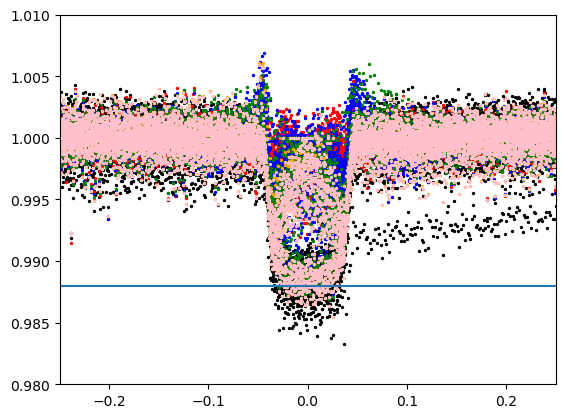

In [11]:

#stack them all on top of each other
plt.scatter(pf0,ff0,s=2,color='black')
plt.scatter(pf1,ff1,s=2,color='red')
plt.scatter(pf2,ff2,s=2,color='blue')
plt.scatter(pf3,ff3,s=2,color='green')
plt.scatter(pf4,ff4,s=2,color='orange')
plt.scatter(pf5,ff5,s=2,color='pink')

plt.xlim(-Dur,Dur)
plt.ylim(0.98,1.01)
plt.axhline(y=0.988)
fig.tight_layout(pad=1)
plt.show()

# Note, that only the black points have a characteristic "--___--" shape. The other colors have some combination of points above and below a normalized flux value of 0.985 during the transit event, which indicates that the filtering is distorting some or all of the transits. 

# With that result, we then need to consider another type of filter that won't distort the transits (or distort them much).

## Hippke et al. 2019 explored different kinds of filters and how they affected transit shapes and detectability and came up with a tool called Wotan! The documentation can be found here:
## https://wotan.readthedocs.io/en/latest/

# Let's install from a new terminal with the command:
```
pip install wotan
```



# How to use Wotan? Let's make a function!

In [16]:
def catalog_info(TIC_ID):
    """Takes TIC_ID, returns stellar information from online catalog using Vizier.
    Input Parameters
    ----------
    TIC_ID : int
        TESS Input Catalog ID number to search for and analyze.
        
    Returns
    -------
        A list of select stellar parameters.
        * (a,b): quadratic limb darkening coefficients cross-matched from 
        limb darkening Claret et al. (2012) tables based on Effective Temperature
        and Surface Gravity of target star (according to the TIC).
        * mass: Stellar Mass (from the TIC) in units of solar masses.
        * mass_min, mass_max: Uncertainty of Stellar Mass (from the TIC) in units of solar masses.
        * radius: Stellar Radius (from the TIC) in units of solar radii.
        * radius_min, radius_max: Uncertainty of Stellar Radius (from the TIC) in units of solar radii.
          
    """
    import requests
    import numpy
    from os import path
    import time as clock
    try:
        from astroquery.mast import Catalogs
    except:
        raise ImportError("Package astroquery required but failed to import")
    #
    #
    #
    result = Catalogs.query_criteria(catalog="Tic", ID=TIC_ID).as_array()
    Teff = float(result['Teff'].data)
    logg = float(result['logg'].data)
    radius = float(result['rad'].data)
    radius_max = float(result['e_rad'].data)
    radius_min = float(result['e_rad'].data)
    mass = float(result['mass'].data)
    mass_max = float(result['e_mass'].data)
    mass_min = float(result['e_mass'].data)
    
    return (mass, mass_min, mass_max, radius, radius_min, radius_max)

def SMA_AU_from_Period_to_stellar(Period,R_star,M_star):
    """
    This function will calculate the Semi-Major Axis (SMA)
    using Kepler's third law.
    
    Input Parameters
    ----------
    Period : float
        Orbital period in days
    R_star : float
        Stellar Radius in solar radii
    M_star : float
        Stellar Mass in solar masses
    Returns
    -------
        * SMA
            Semi-Major Axis in solar units
        * SMA_cm
            Semi-Major Axis in units of centimeters        
    """
    #assumes circular orbit
    #using Kepler's third law, calculate SMA
    #solar units
    import astropy.units as u
    from astropy import constants as const
    RS = u.R_sun.to(u.cm) # in cm
    MS = u.M_sun.to(u.g) # in grams
    #
    G = const.G.cgs.value #cm^3 per g per s^2
    #
    R = R_star*RS
    M = M_star*MS
    P=Period*60.0*24.0*60.0 #in seconds
    #
    #SMA
    SMA_cm = ((G*M*(P**2))/(4*(np.pi**2)))**(1/3)
    #
    #note R_star is already in solar units so we need to convert to cm using
    # solar radius as a constant
    Stellar_Radius = R #now in cm
    #
    SMA = SMA_cm / Stellar_Radius #now unitless (cm / cm)
    return SMA, SMA_cm

def Tdur(Period, R_star,M_star, R_planet_RE):
    """
    This function will calculate the transit duration
    time based on Kepler's third law. 
    Input Parameters
    ----------
    Period : float
        Orbital period in days
    R_star : float
        Stellar Radius in Solar radii
    M_star : float
        Stellar Mass in Solar masses
    R_planet_RE: float
        Planet radius in Earth Radii

    Returns
    -------
        * Tdur : float
            Estimated transit duration time in units of days
    """
    from astropy import units as u

    RE = u.R_earth.to(u.cm) # in cm
    RS = u.R_sun.to(u.cm) # in cm
    A = Period/np.pi #in days
    #
    SMA_cm = SMA_AU_from_Period_to_stellar(Period,R_star,M_star)[1]
    #
    B =(R_star*RS +R_planet_RE*RE)/ SMA_cm # unitless (cm/cm)
    #
    T_dur = A*np.arcsin(B) #in days
    return T_dur    

def smoothing_function(ID,input_LC,window_size_in_days=None,verbose=True,filter_type='biweight'):
    """   
    This function will smooth the input light curve. If no window size is
    provided, a window size corresponding to 3 times the transit duration
    of an Earth-sized planet eclipsing this target star will be used.
    Input Parameters
    ----------
    ID : int
        TESS Input Catalog identification number
    input_LC : pandas dataframe
        Input NEMESIS light curve to be smoothed
    window_size_in_days : float or None
        Desired smoothing window in units of days. Default is set to None.
    verbose : boolean
        This flag is used to print the window size used for smoothing.
    Returns
     -------
    * newlc : Lightkurve LightCurve object
        This Detrended Light Curve contains the follow column names:
        * time
        * flux #this is detrended flux
        * flux_err #this is detrended flux error
    * trend : Lightkurve LightCurve object
        This trend Light Curve contains the follow column names:
        * time
        * flux #this is smoothed lightcurve trend line
        * flux_err #this is detrended flux error (same as input_LC.flux_err)
    """
    from wotan import flatten
    import numpy as np
    import lightkurve as lk
    #
    #
    #read in LC data
    time = input_LC.time.value
    flux_raw = input_LC.flux.value
    flux_error = input_LC.flux_err.value
    #
    if window_size_in_days==None:
        LCDur=(np.nanmax(time) - np.nanmin(time))
        maxP = LCDur/2 #longest period for 2 transits in a light curve (~14 days for TESS single sector LCs)
        R_planet_RE = 1
        M_star, M_star_min, M_star_max, R_star, R_star_min, R_star_max = catalog_info(TIC_ID=ID)
        window_size_in_days = 5*Tdur(maxP, R_star,M_star, R_planet_RE)
    if verbose==True:
        print('window size (days): ',window_size_in_days)
    flatten_lc, trend_lc = flatten(time, flux_raw, window_length=window_size_in_days, \
                                   return_trend=True, method=filter_type,robust=True)
    T=time
    F=flatten_lc
    FE=flux_error
    #checking for NaNs
    nanmask = np.where(np.isfinite(F)==True)[0]
    T = T[nanmask]
    F = F[nanmask]
    FE =FE[nanmask]
    F_raw = flux_raw[nanmask]
    trend_lc=trend_lc[nanmask]
    newlc = lk.LightCurve(time=T,flux=F,flux_err=FE)
    trend = lk.LightCurve(time=T,flux=trend_lc,flux_err=flux_error)
    return newlc, trend




In [20]:
newlc0,trend0 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=None,verbose=True,filter_type='biweight')

newlc1,trend1 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=1,verbose=True,filter_type='biweight')

newlc2,trend2 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=12/24,verbose=True,filter_type='biweight')

newlc3,trend3 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=6/24,verbose=True,filter_type='biweight')

newlc4,trend4 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=3/24,verbose=True,filter_type='biweight')

newlc5,trend5 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=1/24,verbose=True,filter_type='biweight')

newlc6,trend6 = smoothing_function(ID=ID,input_LC=lc,
                                   window_size_in_days=2,verbose=True,filter_type='biweight')

window size (days):  1.1551602860349437
window size (days):  1
window size (days):  0.5
window size (days):  0.25
window size (days):  0.125
window size (days):  0.041666666666666664
window size (days):  2


# Let's look at the phasefolded light curves of the transits again

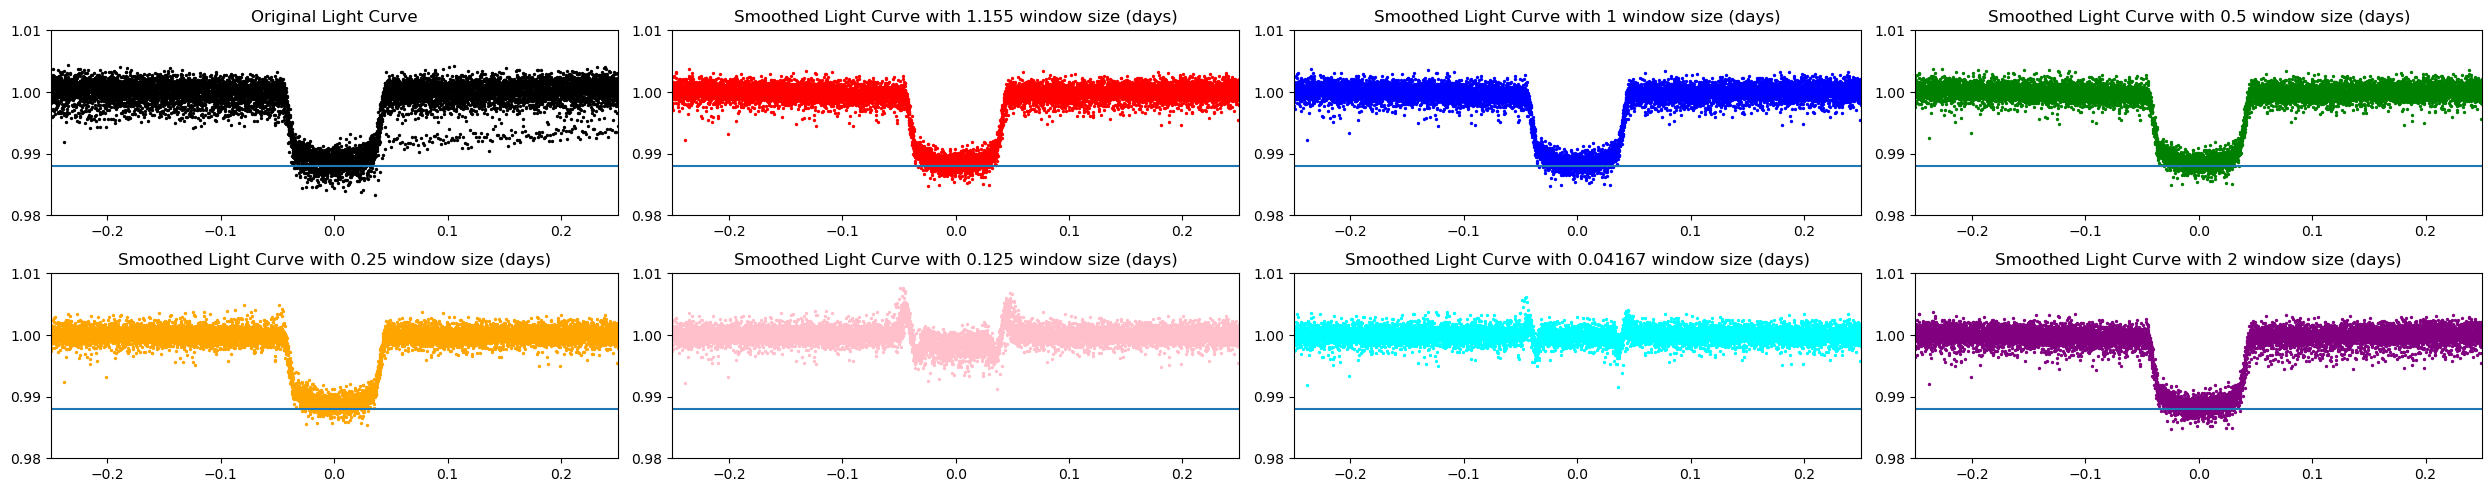

In [21]:
pf0,ff0,fe0 = phasefold_version2(lc.time.value,lc.flux.value,lc.flux_err.value,T0,P)
pf1,ff1,fe1 = phasefold_version2(newlc0.time.value,newlc0.flux.value,newlc0.flux_err.value,T0,P)
pf2,ff2,fe2 = phasefold_version2(newlc1.time.value,newlc1.flux.value,newlc1.flux_err.value,T0,P)
pf3,ff3,fe3 = phasefold_version2(newlc2.time.value,newlc2.flux.value,newlc2.flux_err.value,T0,P)
pf4,ff4,fe4 = phasefold_version2(newlc3.time.value,newlc3.flux.value,newlc3.flux_err.value,T0,P)
pf5,ff5,fe5 = phasefold_version2(newlc4.time.value,newlc4.flux.value,newlc4.flux_err.value,T0,P)
pf6,ff6,fe6 = phasefold_version2(newlc5.time.value,newlc5.flux.value,newlc5.flux_err.value,T0,P)
pf7,ff7,fe7 = phasefold_version2(newlc6.time.value,newlc6.flux.value,newlc6.flux_err.value,T0,P)



fig=plt.figure(figsize=(25,5))
rows=2
columns=4
ax0 = fig.add_subplot(rows, columns, 1)
ax1 = fig.add_subplot(rows, columns, 2)
ax2 = fig.add_subplot(rows, columns, 3)
ax3 = fig.add_subplot(rows, columns, 4)
ax4 = fig.add_subplot(rows, columns, 5)
ax5 = fig.add_subplot(rows, columns, 6)
ax6 = fig.add_subplot(rows, columns, 7)
ax7 = fig.add_subplot(rows, columns, 8)


ax0.scatter(pf0,ff0,s=2,color='black')
ax0.set_xlim(-Dur,Dur)
ax0.set_title('Original Light Curve')


ax1.scatter(pf1,ff1,s=2,color='red')
ax1.set_xlim(-Dur,Dur)
ax1.set_title('Smoothed Light Curve with '+str(1.155)+' window size (days)')

ax2.scatter(pf2,ff2,s=2,color='blue')
ax2.set_xlim(-Dur,Dur)
ax2.set_title('Smoothed Light Curve with '+str(1)+' window size (days)')

ax3.scatter(pf3,ff3,s=2,color='green')
ax3.set_xlim(-Dur,Dur)
ax3.set_title('Smoothed Light Curve with '+str(0.5)+' window size (days)')

ax4.scatter(pf4,ff4,s=2,color='orange')
ax4.set_xlim(-Dur,Dur)
ax4.set_title('Smoothed Light Curve with '+str(0.25)+' window size (days)')

ax5.scatter(pf5,ff5,s=2,color='pink')
ax5.set_xlim(-Dur,Dur)
ax5.set_title('Smoothed Light Curve with '+str(0.125)+' window size (days)')

ax6.scatter(pf6,ff6,s=2,color='cyan')
ax6.set_xlim(-Dur,Dur)
ax6.set_title('Smoothed Light Curve with '+str(0.04167)+' window size (days)')

ax7.scatter(pf7,ff7,s=2,color='purple')
ax7.set_xlim(-Dur,Dur)
ax7.set_title('Smoothed Light Curve with '+str(2)+' window size (days)')

ax0.set_ylim(0.98,1.01)
ax1.set_ylim(0.98,1.01)
ax2.set_ylim(0.98,1.01)
ax3.set_ylim(0.98,1.01)
ax4.set_ylim(0.98,1.01)
ax5.set_ylim(0.98,1.01)
ax6.set_ylim(0.98,1.01)
ax7.set_ylim(0.98,1.01)


ax0.axhline(y=0.988)
ax1.axhline(y=0.988)
ax2.axhline(y=0.988)
ax3.axhline(y=0.988)
ax4.axhline(y=0.988)
ax5.axhline(y=0.988)
ax6.axhline(y=0.988)
ax7.axhline(y=0.988)

fig.tight_layout(pad=1)
plt.show()


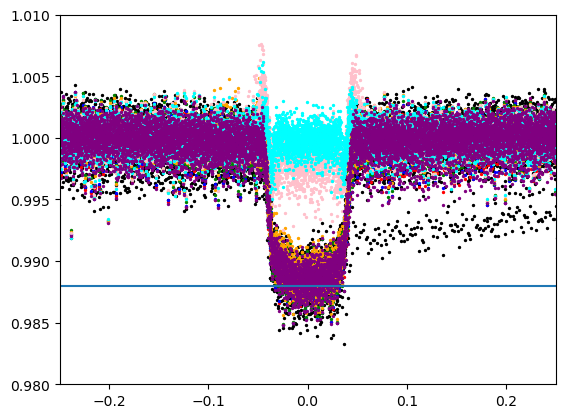

In [22]:
# stack them all together again

plt.scatter(pf0,ff0,s=2,color='black')
plt.scatter(pf1,ff1,s=2,color='red')
plt.scatter(pf2,ff2,s=2,color='blue')
plt.scatter(pf3,ff3,s=2,color='green')
plt.scatter(pf4,ff4,s=2,color='orange')
plt.scatter(pf5,ff5,s=2,color='pink')
plt.scatter(pf6,ff6,s=2,color='cyan')
plt.scatter(pf7,ff7,s=2,color='purple')
plt.xlim(-Dur,Dur)
plt.ylim(0.98,1.01)

plt.axhline(y=0.988)


fig.tight_layout(pad=1)
plt.show()


# It looks like with this new "biweight" filter, most of the window-sizes work well, (except really short windows; see pink and cyan colored data points)